A Support Vector Machine (SVM) is a versatile model that is particularly well suited for classification of complex small- or medium-sized datasets. SVMs are capable of both linear and nonlinear classification, regression, and outlier detection.

Topics:
- Linear SVM Classification
- Nonlinear SVM Classification
- SVM Regression
- Math & Theory

# Linear SVM Classification

Linear SVM Classification is a form of *large margin classification* that determines a decision boundary with the largest possible margin between classes.

*Support vectors* are instances located at the edge of the margin that define the decision boundary.

SVMs are sensitive to feature scales due to their motivation to maximize distance between support vectors. Imbalanced feature scales can result in some features (with larger scales) dominating the maximum distance calculation, so scaling data is an important step before training.

## Soft Margin Classification

Classification that relies on all instances being outside the margins defined by the decision boundary is called **hard margin classification**, which has two prominent issues:

- It only works if the data is linearly separable
- It is sensitive to outliers

**Soft Margin Classification** solves these issues by finding a balance between large margins and allowed margin violations. This balance is defined by regularization parameter $C$. 

- A lower $C$ value allows a large number of margin violations to enable a larger margin
- A higher $C$ value restricts the number of margin violations to reduce the margin size

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [2]:
iris = datasets.load_iris()

# Include petal length and petal width
X = iris['data'][:, (2, 3)]

# Target Iris virginica
y = (iris['target'] == 2).astype(np.float64)

svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_svc', LinearSVC(C=1, loss='hinge'))    
])

svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear_svc',
                 LinearSVC(C=1, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [3]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

In [4]:
# Could also use the standard SVC class
from sklearn.svm import SVC

svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('standard_svc', SVC(kernel='linear', C=1))  
])

svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('standard_svc',
                 SVC(C=1, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='linear', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [5]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

In [6]:
# Could also use the SGD Classifier for out-of-core training on large or online datasets
from sklearn.linear_model import SGDClassifier

svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_sgd', SGDClassifier(loss='hinge', alpha=1/(10*1))) # alpha=1/(m*C  
])

svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear_sgd',
                 SGDClassifier(alpha=0.1, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=0.0,
                               fit_intercept=True, l1_ratio=0.15,
                               learning_rate='optimal', loss='hinge',
                               max_iter=1000, n_iter_no_change=5, n_jobs=None,
                               penalty='l2', power_t=0.5, random_state=None,
                               shuffle=True, tol=0.001, validation_fraction=0.1,
                               verbose=0, warm_start=False))],
         verbose=False)

In [7]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

# Nonlinear SVM Classification

One issue encountered with linear SVM classifiers is that data is rarely linearly separable. One approach for such datasets is to add polynomial features.

In [8]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

# Generate sample 'moons' data in the form of overlapping half circles
X, y = make_moons(n_samples=100, noise=0.15, random_state=47)

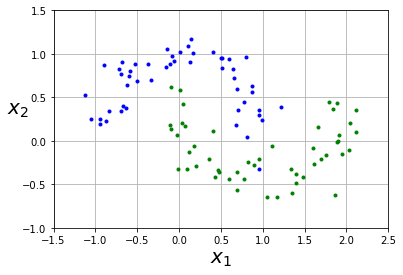

In [9]:
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "b.")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g.")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

axes = [-1.5, 2.5,  -1, 1.5]
plot_dataset(X, y, axes)

In [10]:
# Include PolynomialFeatures in the pipeline
polynomial_svm_clf = Pipeline([
    ('poly_features', PolynomialFeatures(degree=3)),
    ('scaler', StandardScaler()),
    ('svm_clf', LinearSVC(C=10, loss='hinge', max_iter=10000))
])
polynomial_svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('poly_features',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 LinearSVC(C=10, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=10000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

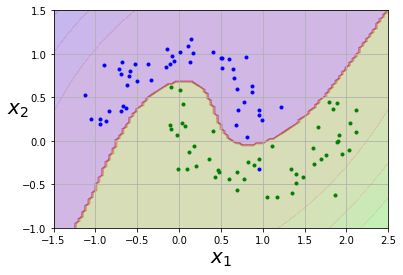

In [11]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_dataset(X, y, axes)
plot_predictions(polynomial_svm_clf, axes)

- Low-degree polynomial features can't handle more complex datasets
- High-degree polynomial features introduce training complexity and severely impact performance

## Polynomial Kernel

The SVC class implements a kernel trick, which can provide the same benefits of adding multiple polynomial features without the added training complexity.

In [12]:
poly_kernel_svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel='poly', degree=3, coef0=1, C=5))
])
poly_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=5, break_ties=False, cache_size=200, class_weight=None,
                     coef0=1, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='poly', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

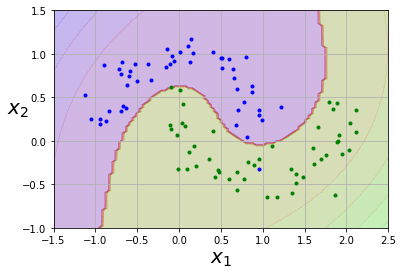

In [13]:
plot_dataset(X, y, axes)
plot_predictions(poly_kernel_svm_clf, axes)

## Similarity Features

A **similarity function** measures how much each instance resembles a **landmark** instance selected as a reference. A common similarity function is the Gaussian Radial Basis Function (RBF).

*Equation 1: Gaussian RBF*

\begin{equation*}
\phi_y(\mathbf{x},\ell)=\text{exp}\bigl(-y||\mathbf{x}-\ell||^2\bigr)
\end{equation*}

In [14]:
def gaussian_rbf(x, landmark, gamma):
    return np.exp(-gamma * np.linalg.norm(x - landmark, axis=1)**2)

gamma = 0.3

# Random data points that are not linearly separable
x_1 = np.sort(np.random.uniform(-4, 4, 9)).reshape(-1, 1)
y_k = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

# Landmarks for x_1
landmarks = x_1[2], x_1[6]

# Gaussian RBF for each landmark
x1s = np.linspace(-4.5, 4.5, 200).reshape(-1, 1)
x2s = gaussian_rbf(x1s, landmarks[0], gamma)
x3s = gaussian_rbf(x1s, landmarks[1], gamma)

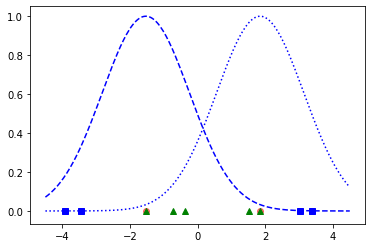

In [15]:
# Visualization for each landmark
plt.plot(x1s, x2s, 'b--')
plt.plot(x1s, x3s, 'b:')
#plt.plot(x_1, np.zeros(9), 'b.')
#plt.plot(x_2, np.zeros(9), 'g.')
plt.plot(x_1[y_k==0], np.zeros(len(x_1[:][y_k==0])), "bs")
plt.plot(x_1[y_k==1], np.zeros(len(x_1[:][y_k==1])), "g^")
plt.scatter(landmarks, np.zeros(len(landmarks)), alpha=0.5, c='red')

[-0.1, 1.1, -0.1, 1.1]

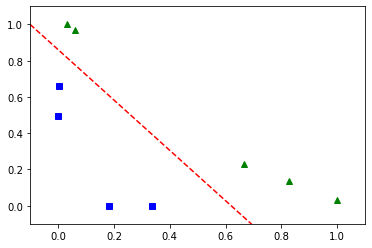

In [34]:
# Apply the Gaussian RBF to the data for each landmark and separate by similarity
x_k = np.c_[gaussian_rbf(x_1, landmarks[0], gamma), gaussian_rbf(x_1, landmarks[1], gamma)]
plt.plot(x_k[:, 0][y_k==0], x_k[:, 1][y_k==0], "bs")
plt.plot(x_k[:, 0][y_k==1], x_k[:, 1][y_k==1], "g^")

# Demonstrate linear separability
plt.plot([-0.1, 0.8], [1.0, -0.25], "r--")
plt.axis([-0.1, 1.1, -0.1, 1.1])

## Gaussian RBF Kernel

The SVC kernel trick can be used for Gaussian RBF as well to achieve performance similar to using many similarity features.

In [17]:
rbf_kernel_svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel='rbf', gamma=5, C=0.001))
])
rbf_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=0.001, break_ties=False, cache_size=200,
                     class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma=5,
                     kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

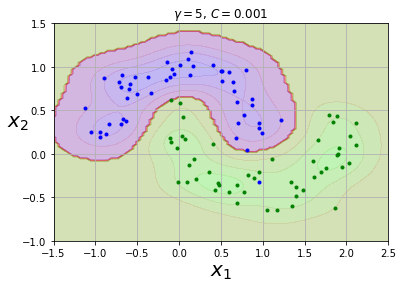

In [18]:
plot_dataset(X, y, axes)
plot_predictions(rbf_kernel_svm_clf, axes)
plt.title(r'$\gamma=5$, $C=0.001$')
plt.show()

A lower $\gamma$ will widen the range of influence for each instance

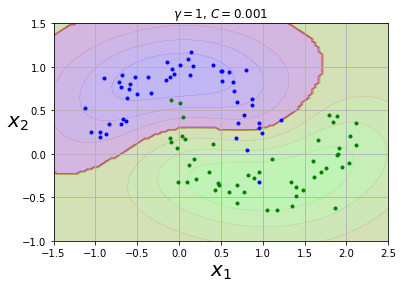

In [19]:
rbf_kernel_svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel='rbf', gamma=1, C=0.001))
])
rbf_kernel_svm_clf.fit(X, y)
plot_dataset(X, y, axes)
plot_predictions(rbf_kernel_svm_clf, axes)
plt.title(r'$\gamma=1$, $C=0.001$')
plt.show()

- If a model is overfitting, $\gamma$ should be reduced
- If it is underfitting, $\gamma$ should be increased

## Computational Complexity

- LinearSVC is typically preferred for larger training sets
- SVC is preferred for small or medium training sets

In [20]:
import pandas as pd
from io import StringIO

compared = StringIO(r"""Class,Time complexity,Out-of-core support,Scaling requred,Kernel trick
LinearSVC,$O(m\times n)$,No,Yes,No
SGDClassifier,$O(m\times n)$,Yes,Yes,No
SVC,$O(m^2\times n)$ to $O(m^3\times n)$,No,Yes,Yes
""")
pd.read_csv(compared)

,Class,Time complexity,Out-of-core support,Scaling requred,Kernel trick
0,LinearSVC,$O(m\times n)$,No,Yes,No
1,SGDClassifier,$O(m\times n)$,Yes,Yes,No
2,SVC,$O(m^2\times n)$ to $O(m^3\times n)$,No,Yes,Yes


# SVM Regression

The SVM algorithm can be applied to linear and nonlinear regression by maximizing the number of instances within a margin, the width of which is controlled by hyperparameter $\epsilon$.

The LinearSVR and SVR classes are regression equivalents of LinearSVC and SVC.

In [21]:
from sklearn.svm import LinearSVR

m = 50
X = 2 * np.random.rand(m, 1)
y = (4 + 3 * X + np.random.randn(m, 1)).ravel()

# Linear regression
svm_reg = LinearSVR(epsilon=1.5)
svm_reg.fit(X, y)

LinearSVR(C=1.0, dual=True, epsilon=1.5, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=None, tol=0.0001, verbose=0)

In [22]:
def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$")
    plt.plot(x1s, y_pred + svm_reg.epsilon, "k--")
    plt.plot(x1s, y_pred - svm_reg.epsilon, "k--")
    plt.plot(X, y, "bo")
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.legend(loc="upper left", fontsize=18)
    plt.axis(axes)

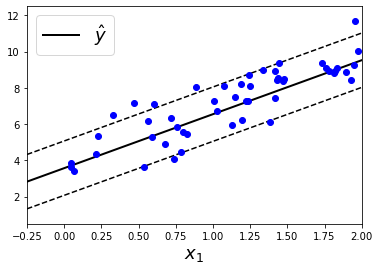

In [23]:
plot_svm_regression(svm_reg, X, y, [-0.25, 2.0, 0.5, 12.5])

In [24]:
# Polynomial
from sklearn.svm import SVR

m = 100
X = 2 * np.random.rand(m, 1) - 1
y = (0.2 + 0.1 * X + 0.5 * X**2 + np.random.randn(m, 1)/10).ravel()

svm_poly_reg = SVR(kernel='poly', degree=2, C=100, epsilon=0.1)
svm_poly_reg.fit(X, y)

SVR(C=100, cache_size=200, coef0=0.0, degree=2, epsilon=0.1, gamma='scale',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

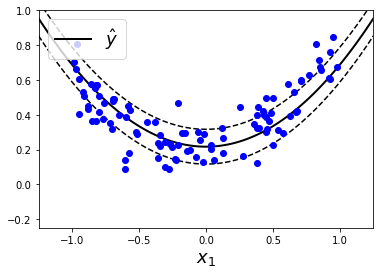

In [25]:
plot_svm_regression(svm_poly_reg, X, y, [-1.25, 1.25, -0.25, 1.0])

# Math & Theory

- $\mathbf{w}$ is the vector of feature weights
- $b$ is the bias term

## Decision Function & Predictions

A linear SVM classifier predicts the class of instance $\mathbf{x}$ by computing decision function $\mathbf{w}^\mathsf{T}\mathbf{x} + b = w_1x_1 + \cdots + w_nx_n + b$ and predicting a positive or negative class for a positive or negative result respectively.

*Equation 2: Linear SVM classifier prediction*

\begin{equation*}
\hat{y}=
    \begin{cases}
    0 & \text{if} & \mathbf{w}^\mathsf{T}\mathbf{x}+b\lt0,\\
    1 & \text{if} & \mathbf{w}^\mathsf{T}\mathbf{x}+b\geq0
    \end{cases}
\end{equation*}

For datasets with $n$ features represented by an $n$-dimensional hyperplane, the decision function is also an $n$-dimensional hyperplane that intersects with it to establish the decision boundary, which is an $(n-1)$-dimensional hyperplane.

The decision boundary includes two equidistant lines defined by the points where the decision function is equal to 1 and -1 respectively, forming the classifier margin. Training a linear SVM classifier determines optimal values for $\mathbf{w}$ and $b$ to maximize this margin while avoiding or limiting violations, depending on whether a hard or soft margin is desired.

## Training Objective

The slope of the decision function is the norm of the weight vector $||\mathbf{w}||$. A larger (steeper) slope narrows the margin between the points at which the decision function is equal to +/- 1, therefore a smaller weight vector is desired to achieve a larger margin.

For hard margins the decision function must be greater than 1 for all positive training instances ($t^{(i)}=1$) and less than -1 for negative training instances ($t^{(i)}=-1$), expressed as $t^{(i)}(\mathbf{w}^\mathsf{T}\mathbf{x}^{(i)}+b)\geq1$ for all instances.

*Equation 3: Hard margin linear SVM classifier objective*

\begin{align}
&\underset{\mathbf{w},b}{\text{minimize}}\Bigl(\frac{1}{2}\mathbf{w}^\mathsf{T}\mathbf{w}\Bigr)\\
&\text{subject to}\quad t^{(i)}\bigl(\mathbf{w}^\mathsf{T}\mathbf{x}^{(i)}+b\bigr)\geq1\quad \text{ for }i=1, 2, \cdots, m
\end{align}


Note that $\frac{1}{2}\mathbf{w}^\mathsf{T}\mathbf{w}$ is equal to $\frac{1}{2}||\mathbf{w}||^2$, this is minimized instead of $||\mathbf{w}||$ for optimization as it has a much simpler derivative ($\mathbf{w}$) and $||\mathbf{w}||$ is not differentiable at $\mathbf{w}=0$.

For soft margins, a slack variable $\zeta$ is introduced to define how much each instance is allowed to violate the margin. Minimizing $\zeta$ conflicts with minimizing $\frac{1}{2}\mathbf{w}^\mathsf{T}\mathbf{w}$, thus the inclusion of hyperparameter $C$ that defines the trade-off between the two.

*Equation 4: Soft margin linear SVM classifier objective*

\begin{align}
&\underset{\mathbf{w},b,\zeta}{\text{minimize}}\Bigl(\frac{1}{2}\mathbf{w}^\mathsf{T}\mathbf{w}+C\sum^m_{i=1}\zeta^{(i)}\Bigr)\\
&\text{subject to}\quad t^{(i)}\bigl(\mathbf{w}^\mathsf{T}\mathbf{x}^{(i)}+b)\geq1-\zeta^{(i)}\quad 
\text{and}\quad
\zeta^{(i)}\geq0\quad
\text{ for }i=1,2\cdots,m
\end{align}

## Quadratic Programming

**Quadratic Programming** is a type of nonlinear programming that is appied to optimizing quadratic functions of variables subject to linear constraints.

*Equation 5: Quadratic Programming problem*

\begin{align}
&\underset{\mathbf{p}}{\text{minimize}}\Bigl(\frac{1}{2}\mathbf{p^\mathsf{T}Hp}+\mathbf{f^\mathsf{T}}\Bigr)\\
&\text{subject to}\quad \mathbf{Ap\le b}
\end{align}

where:
- $\mathbf{p}$ and $\mathbf{f}$ are $n_p$-dimensional vectors
    - $n_p$ is the number of parameters
- $\mathbf{b}$ is an $n_c$-dimensional vector
    - $n_c$ is the number of constraints
- $\mathbf{H}$ is an $n_p \times n_p$ matrix
- $\mathbf{A}$ is an $n_p \times n_c$ matrix

The condition $\mathbf{Ap\leq b}$ defines constraints $\mathbf{p^\mathsf{T}a}^{(i)}\leq b^{(i)}$ for $i=1, 2, \cdots, n_c$ where $\mathbf{a}^{(i)}$ is the $i^{th}$ row of $\mathbf{A}$ and $b^{(i)}$ is the $i^{th}$ element of $\mathbf{b}$.

The linear SVM classifier objectives can be derived from this equation because they are both convex quadratic optimization problems with linear constraints.

## The Dual Problem

For every constrained optimization problem (or primal problem) a closely related problem (the dual problem) may be expressed that, under some  conditions, can have the same solution. The SVM problem is one example where this is the case.

*Equation 6: Dual form of the linear SVM objective*

\begin{align}
&\underset{\alpha}{\text{minimize}} \frac{1}{2} \sum^m_{i=1} \sum^m_{j=1} 
\alpha^{(i)} \alpha^{(j)} t^{(i)} t^{(j)} \mathbf{x}^{(i)\mathsf{T}} \mathbf{x}^{(j)} -
\sum^m_{i=1} \alpha^{(i)}\\
& \text{subject to} \quad \alpha^{(i)} \geq 0 \quad \text{for } i=1,2,\cdots,m
\end{align}

*Equation 7: From the dual solution to the primal solution*

\begin{align}
&\hat{\mathbf{w}} = \sum^m_{i=1} \hat{\alpha}^{(i)} t^{(i)} \mathbf{x}^{(i)}\\
&\hat{b} = \frac{1}{n_s} \sum^m_{i=1,\;\hat{\alpha}^{(i)} \gt 0} \bigl( t^{(i)} - \hat{\mathbf{w}}^\mathsf{T} \mathbf{x}^{(i)} \bigr)
\end{align}

where $\hat{\mathbf{w}}$ and $\hat{b}$ minimize the primal problem.

- When the number of training instances is smaller than the number of features, the dual problem is faster to solve than the primal problem
- The dual problem enables use of the kernel trick, the primal does not

## Kernelized SVMs



*Equation 8: Second-degree polynomial mapping*

\begin{equation*}
\phi(\mathbf{x}) = \phi\biggl(
    \begin{pmatrix}
    x_1\\
    x_2\\
    \end{pmatrix} \biggr) =
    \begin{pmatrix}
    x^2_1\\
    \sqrt{2}x_1x_2\\
    x^2_2\\
    \end{pmatrix}
\end{equation*}

*Equation 9: Kernel trick for a second-degree polynomial mapping*

\begin{align}
\phi(\mathbf{a})^\mathsf{T}\phi(\mathbf{b})
    & = \begin{pmatrix}
    a_1^2\\
    \sqrt{2}a_1a_2\\
    a_2^2\\
    \end{pmatrix}^\mathsf{T}
    \begin{pmatrix}
    b_1^2\\
    \sqrt{2}b_1b_2\\
    b_2^2\\
    \end{pmatrix}\\[1ex]
& = a_1^2b_1^2 + a_1b_1a_2b_2 + a_2^2b_2^2\\[1ex]
& = (a_1b_1 + a_2b_2)^2\\[1ex]
& = \biggl(
    \begin{pmatrix}
    a_1\\
    a_2\\
    \end{pmatrix}^\mathsf{T}
    \begin{pmatrix}
    b_1\\
    b_2\\
    \end{pmatrix}
\biggr)^2\\[1ex]
& = (\mathbf{a^\mathsf{T}b})^2
\end{align}

*Equation 10: Common kernels*

\begin{array}{@{}rl}
\text{Linear:} & K(\mathbf{a}, \mathbf{b}) = \mathbf{a^\mathsf{T}b}\\
\text{Polynomial:} & K(\mathbf{a}, \mathbf{b}) = (\gamma\mathbf{a^\mathsf{T}}+r)^d\\
\text{Gaussian RBF:} & K(\mathbf{a}, \mathbf{b}) = \text{exp}\bigl( -\gamma ||\mathbf{a-b}||^2 \bigr)\\
\text{Sigmoid:} & K(\mathbf{a}, \mathbf{b}) = \text{tanh}(\gamma\mathbf{a^\mathsf{T}b}+r)
\end{array}

*Equation 11: Making predictions with a kernelized SVM*

\begin{align}
h_{\hat{\mathbf{w}},\;\hat{b}} 
& = \hat{\mathbf{w}}^\mathsf{T}\phi\bigl( \mathbf{x}^{(n)} \bigr) + \hat{b}\\[1ex]
& = \biggl( 
    \sum_{i=1}^m \hat{\alpha}^{(i)} t^{(i)} \phi\bigl( 
        \mathbf{x}^{(i)} 
    \bigr) 
\biggr)^\mathsf{T} \phi\bigl( \mathbf{x}^{(i)} \bigr) + \hat{b}\\[1ex]
& = \sum_{i=1}^m \hat{\alpha}^{(i)} t^{(i)} \bigl(
    \phi\bigl(
        \mathbf{x}^{(i)}
    \bigr)^\mathsf{T} \phi\bigl(
        \mathbf{x}^{(n)}
    \bigr)
\bigr) + \hat{b}\\[1ex]
& = \sum_{i=1,\; \hat{\alpha}^{(i)} \gt 1} \hat{\alpha}^{(i)} t^{(i)} K\bigl(
    \mathbf{x}^{(i)},\, \mathbf{x}^{(n)}
\bigr) + \hat{b}
\end{align}

*Equation 12: Using the kernel trick to compute the bias term*

\begin{align}
\hat{b} 
& = \frac{1}{n_s} \sum_{i=1,\; \hat{\alpha}^{(i)} \gt 0} \bigl(
    t^{(i)} - \hat{\mathbf{w}}^\mathsf{T} \phi \bigl(
        \mathbf{x}^{(i)}
    \bigr)
\bigr)\\
& = \frac{1}{n_s} \sum_{i=1,\; \hat{\alpha}^{(i)} \gt 0} \Bigl(
    t^{(i)} - \Bigl(
        \sum_{j=1}^m \hat{\alpha}^{(j)} t^{(j)} \phi \bigl(
            \mathbf{x}^{(j)}
        \bigr)
    \Bigr)^\mathsf{T} \phi \bigl(
        \mathbf{x}^{(i)}
    \bigr)
\Bigr)\\
& = \frac{1}{n_s} \sum_{i=1,\; \hat{\alpha}^{(i)} \gt 0} \Biggl(
    t^{(i)} - \sum_{j=1,\; \hat{\alpha}^{(j)} \gt 0} \hat{\alpha}^{(j)} t^{(j)} K \bigl(
        \mathbf{x}^{(i)},\, \mathbf{x}^{(j)}
    \bigr)
\Biggr)
\end{align}